In [ ]:
# This cleaning process is inspired by inspired by https://github.com/imdeepmind/processed-imdb-wiki-dataset
# along with the concept in "Age and Gender Prediction from Face Images Using Convolutional Neural Network" by Koichi Ito, etc.


In [3]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

imdb_mat = 'imdb_crop/imdb.mat'
wiki_mat = 'wiki_crop/wiki.mat'

imdb_data = loadmat(imdb_mat)
wiki_data = loadmat(wiki_mat)

del imdb_mat, wiki_mat

imdb = imdb_data['imdb']
wiki = wiki_data['wiki']

imdb_photo_taken = imdb[0][0][1][0]
imdb_full_path = imdb[0][0][2][0]
imdb_gender = imdb[0][0][3][0]
imdb_face_score1 = imdb[0][0][6][0]
imdb_face_score2 = imdb[0][0][7][0]

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

imdb_path = []
wiki_path = []

for path in imdb_full_path:
    imdb_path.append('imdb_crop/' + path[0])

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

imdb_genders = []
wiki_genders = []

for n in range(len(imdb_gender)):
    if imdb_gender[n] == 1:
        imdb_genders.append('male')
    else:
        imdb_genders.append('female')

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

imdb_dob = []
wiki_dob = []

for file in imdb_path:
    temp = file.split('_')[3]
    temp = temp.split('-')
    if len(temp[1]) == 1:
        temp[1] = '0' + temp[1]
    if len(temp[2]) == 1:
        temp[2] = '0' + temp[2]

    if temp[1] == '00':
        temp[1] = '01'
    if temp[2] == '00':
        temp[2] = '01'
    
    imdb_dob.append('-'.join(temp))

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])


imdb_age = []
wiki_age = []

for i in range(len(imdb_dob)):
    try:
        d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    imdb_age.append(diff)

for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)

final_imdb = np.vstack((imdb_age, imdb_genders, imdb_path, imdb_face_score1, imdb_face_score2)).T
final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

final_imdb_df = pd.DataFrame(final_imdb)
final_wiki_df = pd.DataFrame(final_wiki)

time data '0-12-22' does not match format '%Y-%m-%d'
time data '0-05-21' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-

In [61]:
final_imdb_df.columns = cols
final_wiki_df.columns = cols

meta = pd.concat((final_imdb_df, final_wiki_df))

# face score1 should be greater than 1
# face score2 should not exist
# age should be within 0 and 101
meta = meta[meta['face_score1'].astype(float) > 1]
meta = meta[meta['face_score2'] == 'nan']
meta = meta[meta['age'].astype(int) >= 0]
meta = meta[meta['age'].astype(int) < 101]

meta = meta.sample(frac=1)

In [62]:
meta.shape

(213510, 5)

In [63]:
# check invalid gender
sum(meta['gender'] == 'male') + sum(meta['gender'] == 'female')

213510

In [64]:
meta = meta.drop(['face_score1', 'face_score2'], axis=1)
meta.to_csv('meta.csv', index=False)

In [66]:
meta.head()

,age,gender,path
451814,67,female,imdb_crop/88/nm0597188_rm3475685376_1945-10-1_...
131795,42,female,imdb_crop/53/nm0001853_rm229610496_1963-3-18_2...
187562,23,male,imdb_crop/27/nm0205127_rm150706432_1978-5-8_20...
61498,39,male,imdb_crop/91/nm0000491_rm1938529024_1964-7-22_...
313603,30,female,imdb_crop/19/nm0446819_rm1005361408_1975-3-28_...


In [1]:
import cv2
import os
from sklearn.model_selection import train_test_split

In [3]:
train_img_name = []
train_age = []
train_gender = []
test_img_name = []
test_age = []
test_gender = []

In [4]:
## cleaning data to train and test sets
## The train set is gender-balanced.

# Loading the data
meta = pd.read_csv('meta.csv')

# Spliting the dataset into train and test set
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=2040)

# The dataset contains more male faces that female faces. This can couse some problems.
# One feature can start dominating on other feature. To solve this, we use equal number of male and female faces in the training set
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

if no_male > no_female:
    extra = D_train_male[no_female:]
    D_train_male = D_train_male[0:no_female]
    D_test = pd.concat((D_test, extra))
else:
    extra = D_train_male[no_male:]
    D_train_male = D_train_male[0:no_male]
    D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

# Shuffling the dataset
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

# Generating folder struture for the data
output_dir_train = 'dataset/train'
output_dir_test = 'dataset/test'

if not os.path.exists(output_dir_train):
    os.makedirs(output_dir_train)

if not os.path.exists(output_dir_test):
    os.makedirs(output_dir_test)

# Finally processing the image training and testting set
counter = 0

for image in D_train.values:
    img = cv2.imread(image[2], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite(output_dir_train + '/' + str(counter) + '.jpg', img)
    train_img_name.append(str(counter))
    train_age.append(image[0])
    train_gender.append(image[1])
    if counter%10000 == 0:
        print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[2], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite(output_dir_test + '/' + str(counter) + '.jpg', img)
    test_img_name.append(str(counter))
    test_age.append(image[0])
    test_gender.append(image[1])
    if counter%10000 == 0:
        print('--('+str(counter)+')Processing--')
    counter += 1

--(0)Processing--
--(10000)Processing--
--(20000)Processing--
--(30000)Processing--
--(40000)Processing--
--(50000)Processing--
--(60000)Processing--
--(70000)Processing--
--(80000)Processing--
--(90000)Processing--
--(100000)Processing--
--(110000)Processing--
--(120000)Processing--
--(130000)Processing--
--(140000)Processing--
--(150000)Processing--
--(160000)Processing--
--(0)Processing--
--(10000)Processing--
--(20000)Processing--
--(30000)Processing--
--(40000)Processing--


In [5]:
train_ = np.vstack((train_img_name, train_age, train_gender)).T
test_ = np.vstack((test_img_name, test_age, test_gender)).T

train_df = pd.DataFrame(train_)
test_df = pd.DataFrame(test_)

cols = ["file_name", "age", "gender"]
train_df.columns = cols
test_df.columns = cols

train_df.to_csv('index_train.csv', index=False)
test_df.to_csv('index_test.csv', index=False)
print('----Done----')

----Done----


In [78]:
## Cleaning data by age

# Loading dataset
meta = pd.read_csv('meta.csv')

# Dropping gender column
meta = meta.drop(['gender'], axis=1)

# Converting into numpy array
meta = meta.values

# Spliting dataset into training and testing set
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=2040)

# Making the directory structure
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)

# Finally making the training and testing set
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    if counter%10000 == 0:
        print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    if counter%10000 == 0:
        print('--('+str(counter)+')Processing--')
    counter += 1

--(0)Processing--
--(10000)Processing--
--(20000)Processing--
--(30000)Processing--
--(40000)Processing--
--(50000)Processing--
--(60000)Processing--
--(70000)Processing--
--(80000)Processing--
--(90000)Processing--
--(100000)Processing--
--(110000)Processing--
--(120000)Processing--
--(130000)Processing--
--(140000)Processing--
--(150000)Processing--
--(160000)Processing--
--(170000)Processing--
--(0)Processing--
--(10000)Processing--
--(20000)Processing--
--(30000)Processing--
--(40000)Processing--


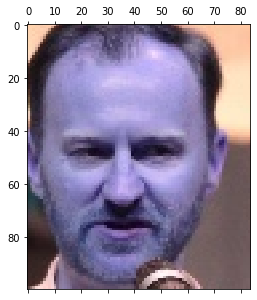

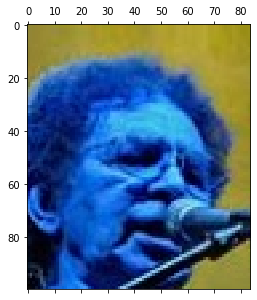

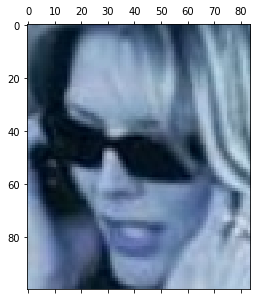

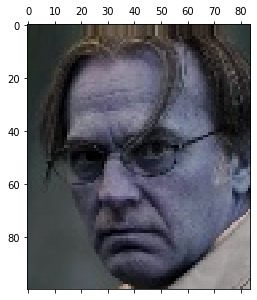

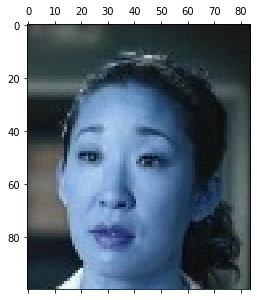

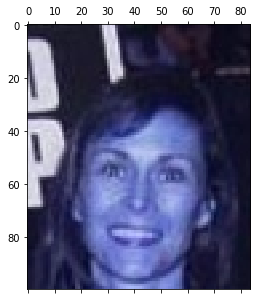

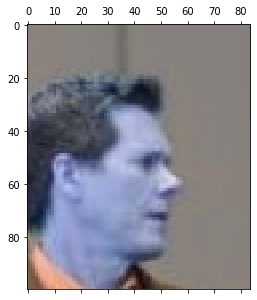

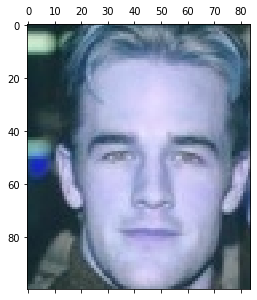

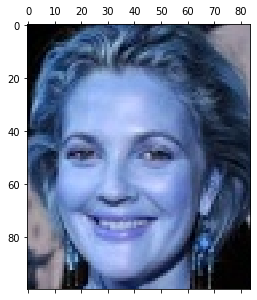

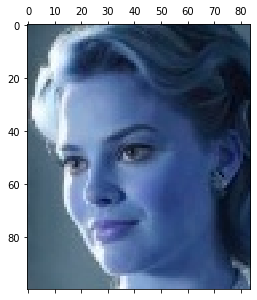

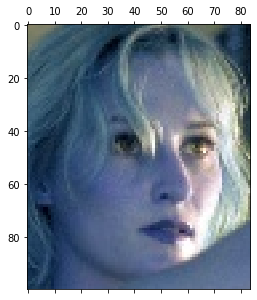

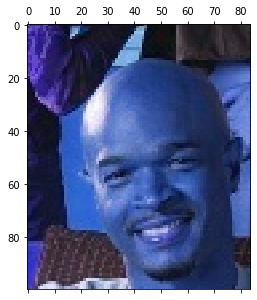

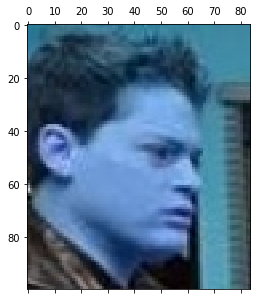

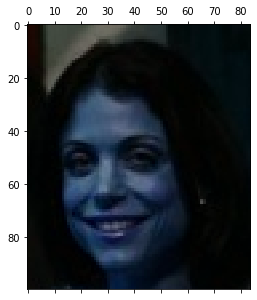

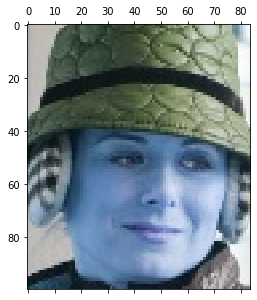

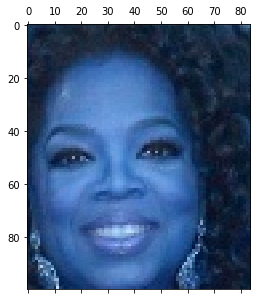

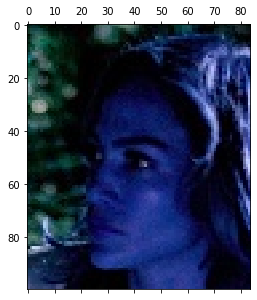

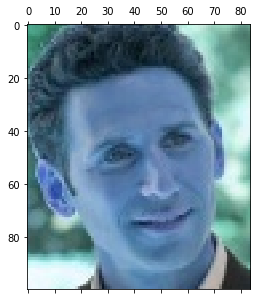

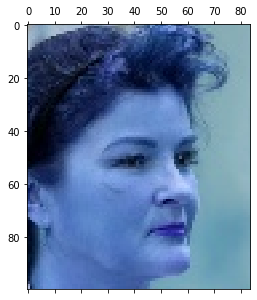

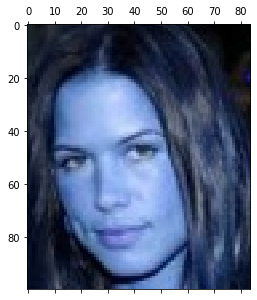

In [16]:
# further cropping
# This can reduce data size by roughly 50%.
import cv2
from matplotlib import pyplot as plt

for i in range(20):
    file = 'dataset/train/' + str(i) + '.jpg'
    img = cv2.imread(file)
    y = 0
    h = 100
    x = 23
    w = 84
    crop_img = img[y:y+h, x:x+w]
    plt.matshow(crop_img)
    plt.show()

In [17]:
crop_img.shape

(100, 84, 3)

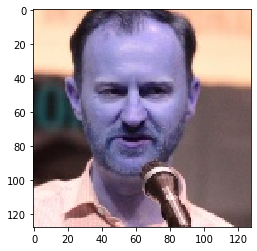

In [4]:
plt.imshow(img)